## P4DS Summative Assignment 2

# Data Analysis Project


# An Analysis Into the Trends of Covid Rates and Deaths


#### Student:Peter Spanner

#### Email: od23ps@leeds.ac.uk

# Project Plan

## The Data (15 marks)

The data used in this project will come from two data sources that will be combined to aid in the analysis and aims of this project. 

The first dataset contains 306429 records of Corona Virus data from the 22nd January 2020 until 29th May 2021. The data columns in this dataset are the observation date, the province/state for the record, the country/region of the record, the last updated time for the record, confirmed cases, deaths, and recovered. The columns for confirmed cases, deaths and recovered are all cumulative values. 

This dataset is sourced from data collected by John Hopkins University which they aggregated from multiple sources including the World Health Organization (WHO), European Centre for Disease Prevention and Control (ECDC) and the Covid Tracking Project. As this dataset was created by a well-recognised research university with data sourced from governments and global organisations the data contained is of a high-quality and accuracy and is highly reliable to not contain mistakes when the data was entered. The dataset can be accessed from https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset or https://github.com/CSSEGISandData/COVID-19  

While the data is of a high quality, it does contain some fields which will need to be cleaned before use. One of these fields is the ObservationDate field as some of the records are recorded in Date format while others are recorded as General format. The Province/State field also contains missing records and data labelled as Unknown which will need to be cleaned as appropriate. The Country/Region field contains some duplicate records which are labelled differently, one example of this is there is a label for Mainland China and China which only contains unknown records. 

The second dataset will be used in conjunction with the first dataset for project objectives 2 and 3 and contains 366 records of population data from cities in China. The fields contained in this dataset are city, the latitude and longitude of the city, country, the iso code for the country, the admin name which is the highest level administration region of the city, the urban population of the city, the proper population which is the municipal population, and the capital which is either Primary for a countries capital, Admin for first-level admin capital or Minor for lower-level admin capital, this can also be blank if city is not a capital. 

This dataset is available from https://simplemaps.com/data/cn-cities which sources their data from the National Geospatial-Intelligence Agency. As this dataset is sourced from information provided by an agency within the United States Department of Defence it very reliable and the accuracy of this data is very high. This data is aggregated, formatted, and cleaned by Simplemaps which means there are few errors that need to be addressed when using this data. 

The only cleaning which needs to be performed on this data is that some population numbers are missing, as the population field is being used these rows will be dropped. 




## Project Aim and Objectives (5 marks)

The aim of this project is to analyse the trends and any correlations of infection and deaths caused by the Novel Corona Virus which could allow for governments to better combat similar outbreaks in the future. 

To do this the data will first be analysed on a global scale to analyse the trends in relation to confirmed rates and death rates by season. Following on from this the dataset will be restricted to China and the population dataset will be included in the analysis alongside the covid dataset. This will allow for trends to be seen in accordance with population size.

The project will be using the correlation of certain fields from the datasets in order to answer the objectives of the project. The main correlations that will be checked are the seasons in relation to the cases/deaths, the deaths and confirmed cases with regard to the province, and the province populations with regards to the cases confirmed and deaths. 

As objective two and three should not be dependant on day and the values in the covid dataset are cumulative, the latest day with the most provinces available will be used for the analysis of these two objectives.

This project will result in a series of tables and visualisations which will then be used to explain the analysis in detail to provide answers and evidence to them in relation to each of the objectives listed below. 


### Specific Objective(s)

* __Objective 1:__ Analyse the seasonal differences in covid rates/deaths
* __Objective 2:__ Analyse if provinces with higher populations had proportional rates of cases and deaths, potentially indicating strain on healthcare resources.
* __Objective 3:__ Determine if provinces with higher populations have the highest mortality rates among confirmed cases.

## System Design (5 marks)

### Architecture

<img src="Architecture.png" />

The architecture for this project starts off with importing both datasets so they can be used throughout the program. The next stage is to clean both the covid and city datasets so that all values are in the same formats, and that any unknown, missing or unusable values are removed alongside any data that will not get used.

The dates in the covid dataset will be used to create a feature for seasons and then be analysed to provide data that can be used in the analysis of objective one. This will include any calculations and statistical generation required for this step. 

Following on from this the covid dataset will be reduced to only contain information from Mainland China and then the datasets will be combined by city name. 

This combined dataset will then be used to perform analysis for objective two and three. The final step will be creating visualisations from the data produced. 

  
### Processing Modules and Algorithms

* Clean both datasets by handling missing values and correcting formats on dates
* Converting dates into a seasonal feature in the covid dataset 
* Combining both datasets to be used in conjunction for analysis relating covid in different population sizes
* Analysing the covid dataset and combined datasets in regards to the objectives of the project, this will use Analysis of Variance (ANOVA) and Pearson Correlation
* Presenting the information using visualisation of the data using box-plots, scatterplots, linegraphs and barcharts


# Program Code (25 marks)

### Objective 1 Analyse the seasonal differences in covid rates/deaths

The below code cell loads both datasets into variables and then displays the first 5 lines from each dataset to show the layout of the data within the dataframes

In [3]:
import pandas as pd 

# Function to load data into dataframe from filename
def import_data_file(file):
    return pd.read_csv(file)

# Import both datasets into separate dataframes
covid_dataset = import_data_file('covid_19_data.csv')
china_pop_dataset = import_data_file('cn.csv')

# Display first 5 lines of each dataframe to ensure they have loaded correctly
display(covid_dataset.head())
display(china_pop_dataset.head())

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Guangzhou,23.1300,113.2600,China,CN,Guangdong,admin,26940000.0,14498400.0
1,Shanghai,31.1667,121.4667,China,CN,Shanghai,admin,24073000.0,24870895.0
2,Beijing,39.9040,116.4075,China,CN,Beijing,primary,18522000.0,18522000.0
3,Shenzhen,22.5350,114.0540,China,CN,Guangdong,minor,17619000.0,12528300.0
4,Chengdu,30.6600,104.0633,China,CN,Sichuan,admin,14645000.0,16044700.0


The above output shows the covid dataset with 8 columns and the china pop dataset with 9 columns which were explain in the project details at the beginning of this project

#### Clean covid dataset

In [4]:
# Check for null values in the dataset
covid_dataset.info()
#Replace Unknown strings for null values and drop any rows which contain unknown values
covid_dataset.replace("Unknown", pd.NA, inplace=True)
covid_dataset.dropna(inplace=True)
# Converts all string into datetime format
covid_dataset["ObservationDate"] = pd.to_datetime(
    covid_dataset["ObservationDate"],format='%m/%d/%Y', errors='coerce')
#Check that data has been dropped and amended
covid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 224203 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              224203 non-null  int64         
 1   ObservationDate  224203 non-null  datetime64[ns]
 2   Province/State   224203 non-nul

The above code cell cleans the covid dataset by replacing the string unknown with a null value and then dropping rows which contain null values. This is useful as the only column with null values is the province/state column which is the same column which contains the unknown string values. 

After dropping null valued rows the total number of rows in this dataset is now 224203

The ObservationDate column is converted into a datetime format to make analysis on this column simpler later. The dataset is checked before and after the changes to ensure the null values are removed and the Dtype has changed as appropriate.

In [5]:
# Get all unique entries in the country/region column 
covid_dataset["Country/Region"].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Canada',
       'Australia', 'Germany', 'Others', 'Israel', 'France', 'UK',
       'Denmark', 'Netherlands', 'Italy', 'Spain', 'Brazil', 'Mexico',
       'Chile', 'Japan', 'Colombia', 'Peru', 'Russia', 'Ukraine',
       'Sweden', 'India', 'Pakistan', 'Belgium'], dtype=object)

The code cell above shows all different values that exist in the covid dataset. From this it shows that the duplicate value "China" and "Mainland China" has been rectified from the above operations as these values contained the unknown field which was removed.

#### Clean city data

In [6]:
# Drop any null rows
china_pop_dataset.dropna(inplace=True)
# Group by admin_name to allow for combining with covid_dataset on province/state column 
# without duplicating population values for each city
china_pop_dataset = china_pop_dataset[
    ["admin_name", "population", "population_proper"]].groupby("admin_name").sum()

#### Create season vector

In [7]:
# Create a season dict with the following number mappings
# 1: Winter
# 2: Spring
# 3: Summer
# 4: Autumn
season_dict = {"1": 1, "2": 1, "3": 2, "4": 2, "5": 2,
               "6": 3, "7": 3, "8": 3, "9": 4, "10": 4,
               "11": 4, "12": 1}

# Add a new column onto the dataset to store the season value as above in relation to the month of the observation date
covid_dataset["Season"] = covid_dataset["ObservationDate"].apply(
    lambda x: season_dict[str(x.month)])

# Display first columns to check the new column was added correctly
display(covid_dataset.head())

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Season
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,1
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,1
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,1


The above cell adds a season vector column onto the covid dataset and then displays the first 5 rows to see that the column has been added correctly. 

This season vector is mapped as 1 = Winter, 2 = Spring, 3 = Summer, 4 = Autumn. As this dataset is over a period of 1.5 years, winter and spring of 2021 are also included. This will be taken into account below as if this dataset was grouped by season it would cause the data to be inaccurate as the winter and spring seasons would be made up of 2 groups whereas the summer and autumn seasons would only have 1 group for the year 2020

In [8]:
# Sort the values by province and observation data
covid_dataset = covid_dataset.sort_values(by=["Province/State", "ObservationDate"])

# Calculate daily values for confirmed from cumulative values and add into a new column
covid_dataset["Daily_Confirmed"] = covid_dataset.groupby(
    ["Province/State", "Country/Region"])["Confirmed"].diff().fillna(
    covid_dataset["Confirmed"])

# Calculate daily values for deaths from cumulative values and add into a new column
covid_dataset["Daily_Deaths"] = covid_dataset.groupby(
    ["Province/State", "Country/Region"])["Deaths"].diff().fillna(
    covid_dataset["Deaths"])

As the data is cumulative it needs to be transformed into daily values so that data is not being repeated in later seasons, if this data was not transformed it would lead to the data being incorrect and misrepresent any trends that may occur. The above cell adds new columns onto the covid dataset to represent the daily records of confirmed cases and deaths. This is done by getting the difference by province for the last entry and current entry when sorted by date. The can sometimes be a negative number if the data has been corrected. 

The below code splits the datasets into two dataframes consisting of all rows where the observation date is in the year 2020 and the rows in 2021. This is then passed into a function which groups the dataframe by season and country/region, the grouped data is summed by daily confirmed and daily death values. 

This split is to ensure seasons from different years are not grouped together when passed into the get_seasonal_dataset function.

The data is then displayed to allow for a visual representation of this. 

In [9]:
# Split the dataset into entries from 2020 and entries from 2021 to allow for each year to be plotted separately
covid_2020 = covid_dataset.loc[covid_dataset["ObservationDate"].apply(
    lambda x: x.year == 2020)]
covid_2021 = covid_dataset.loc[covid_dataset["ObservationDate"].apply(
    lambda x: x.year == 2021)]

def get_seasonal_dataset(df, confirmed_label, death_label):
    # Group data by season to get values of confirmed cases and deaths by season, use unstack to give each seaon it's 
    # own row
    df_seasonal = df[["Country/Region", 
                                      confirmed_label, 
                                      death_label, 
                                      "Season"]].groupby(
        ["Season", "Country/Region"]).sum().unstack()

    # Drop any countries with missing data as this would not be useful when anaylysing the trends between seasons
    df_seasonal = df_seasonal.dropna(axis=1)
    return df_seasonal
    
# Generate seasonal datasets for each year of data by country and confirmed cases and deaths
covid_2020_seasonal = get_seasonal_dataset(covid_2020, "Daily_Confirmed", "Daily_Deaths")
covid_2021_seasonal = get_seasonal_dataset(covid_2021, "Daily_Confirmed", "Daily_Deaths")

# Display the covid 2020 seasonal dataframe to show the layout
display(covid_2020_seasonal)

Daily_Confirmed                                           \
Country/Region       Australia     Brazil    Canada     Chile  Colombia   
Season                                                                    
1                        538.0  1340095.0  202875.0   57231.0  325969.0   
2                       7177.0   514849.0   92493.0   99688.0   27219.0   
3                      18617.0  3393423.0   38439.0  311982.0  587875.0   
4                       2093.0  2427606.0  250639.0  140028.0  701712.0   

                                                                ...  \
Country/Region Denmark   France   Germany Hong Kong      Italy  ...   
Season                                                          ...   
1                116.0   7283.0  678243.0    2627.0   505612.0  ...   
2               1526.0  17445.0  181835.0     989.0   232997.0  ...   
3                225.0  13653.0   61030.0    3726.0    36217.0  ...   
4                 96.0  36670.0  825826.0    1504.0  1332340.0  ...   

               Daily_Deaths                                                    \
Country/Region        Italy   Japan Macau Mainland China   Mexico Netherlands   
Season                                                                          
1                   18583.0  1216.0   0.0         2835.0  19867.0      2065.0   
2                   33415.0   898.0   0.0         1799.0   9930.0       155.0   
3                    2068.0   400.0   0.0            0.0  54484.0      6215.0   
4                   20093.0   778.0   0.0            0.0  41526.0      3192.0   

                                                     
Country/Region     Peru    Spain       UK        US  
Season                                               
1                1757.0   5768.0  15077.0   81144.0  
2                4506.0  27127.0    323.0  104678.0  
3               24282.0   1967.0  41507.0   79098.0  
4                7135.0  15975.0  16956.0   87266.0  

[4 rows x 38 columns]

The above code cell shows the data is now in 2 columns of confirmed cases and deaths, with each of these having sub-columns representing the country. The rows in this table represent each season. 

Some entries like Deaths in Macau have 0 records which will interfere with the plot and are likely missing data so will be removed.  

From a quick look at the first columns of the confirmed cases, it is hard to tell if any correlation is apparent in the data as different countries have different seasons as their peaks for both cases and deaths. As this is hard to tell from a table, this will be visualised and shown in a graph. 

In [10]:
# Remove any 0 values if occurs in all columns for a country 
# Takes all rows, creates boolean dataframe from != 0.0 and then checks if any are true are returns only those indexes
covid_2020_seasonal = covid_2020_seasonal.loc[:, (
    covid_2020_seasonal != 0.0).any(axis=0)]

In [11]:
import matplotlib.pyplot as plt

def graph_by_season(df, df_year):
    # Divide by common factor to reduce the magnitude of the numbers
    # Use copy dataset to leave original values intact
    df_new = df.copy()
    df_new["Daily_Confirmed"] = df["Daily_Confirmed"]/10000
    df_new["Daily_Deaths"] = df["Daily_Deaths"]/10000
    
    # Get the average for each season to plot as a trend line
    average_confirmed_by_season = df_new["Daily_Confirmed"].mean(axis=1)
    average_deaths_by_season = df_new["Daily_Deaths"].mean(axis=1)
    
    # Add trend label to be included in the legend
    trend_label = ["Trend"]
    trend_label.extend(df_new["Daily_Confirmed"].columns)

    # Create plot of 2 rows and 1 column
    fig, axes = plt.subplots(2, 1, figsize=(8,5))
    
    # Plot both bar graphs sharing the x axis 
    df_new["Daily_Confirmed"].plot(
        kind="bar", 
        ax=axes[0], 
        legend=False, 
        cmap="hsv",
        sharex=True,
        ylabel="Cases",
        xlabel="Season",
        title = "Confirmed cases by Season for country " + df_year)

    df_new["Daily_Deaths"].plot(
        kind="bar", 
        ax=axes[1], 
        legend=False, 
        cmap="hsv",
        ylabel="Deaths",
        xlabel="Season",
        title = "Deaths by Season for country " + df_year
    )
    
    # Plot the trend lines on both graphs using the averages
    axes[0].plot([x for x in range(
        len(average_confirmed_by_season))], average_confirmed_by_season)
    axes[1].plot([x for x in range(
        len(average_confirmed_by_season))], average_deaths_by_season)

    # Create figure legend outside the graph
    fig.legend(labels=trend_label, loc="center right", bbox_to_anchor=(1.25, 0.5))

    plt.tight_layout()
    plt.show()

The above code cell creates a function which calculates the average for both confirmed and deaths per season in relation to each country, then plots 2 graphs representing both the number of confirmed cases and deaths by season along with the average plotted on the graphs as a trend line. 

This graph is analysed more within the visualisation section of the report under objective 1.

In [12]:
from scipy.stats import f_oneway

# Add prefix to covid 2021 dataset to differentiate for the anova test
covid_2021_seasonal = covid_2021_seasonal.add_prefix("2021-", axis=0)

# Combine both seasonal datasets and drop any columns which do not contain data for both years
combined_seasons = pd.concat([covid_2020_seasonal,covid_2021_seasonal])
combined_seasons.dropna(axis=1, inplace=True)

def perform_anova(column):
    # Split the data into groups based on season, data needs to be transposed so seasons are the columns
    groups = [combined_seasons[column].T[season]
          for season in combined_seasons[column].T.columns]

    
    # Perform one-way ANOVA test
    f_stat, p_val = f_oneway(*groups)
    
    #Print results
    print(f"F-statistic {column}: {f_stat}")
    print(f"P-value {column}: {p_val}")

perform_anova("Daily_Confirmed")
perform_anova("Daily_Deaths")

F-statistic Daily_Confirmed: 0.8186342846930144
P-value Daily_Confirmed: 0.5389771091310921
F-statistic Daily_Deaths: 0.6328907780100228
P-value Daily_Deaths: 0.6750551431760266


The above code cell runs an anova test on the combined seasonal data which tests for a statistical difference between the means of the seasons provided. The null hypothesis of this test is that there is no statistically significant difference between the means of the seaons. 

The F-statistic being relatively low indicates that the groups all have similar sample means. 

##### Daily Confirmed
The p-value provided from this test is greater than 0.05 which suggests there is not a statistically significant difference between the means of any different seasons. 

From this is can be concluded that the season does not have any correlation with the amount of daily confirmed cases.

##### Daily Deaths
The p-value for this test is also above 0.05 suggesting that there is no statistically significant difference between the season means. 

This can be concluded that the season does not have any correlation with the amount of daily deaths

#### Combine datasets

In [13]:
# Reduce the covid_dataset to only contain values from Mainland Chine
# Rename Provinve/State to admin_name to match population dataset
china_covid_dataset = covid_dataset.loc[covid_dataset["Country/Region"] == "Mainland China"]
china_covid_dataset = china_covid_dataset.rename(columns={'Province/State': 'admin_name'})

# Combine china_covid and china_population datasets on city
# Use inner join to 
china_combined = china_covid_dataset.merge(china_pop_dataset, how='left', on="admin_name")

The above cell creates a new dataframe from the covid dataset only using values from Mainland China. The province/state column is then renamed to admin_name to merge with the china population dataset.

The merge is then performed on admin_name which joins both of the dataframe together into one dataframe. 

In [14]:
# Group by observation date and count unique admin_names
date_counts = china_combined.groupby("ObservationDate")["admin_name"].nunique()
#Find observation date of the highest unique admin_names from the last value as start values might contain less
# accurate reported data
max_dates = date_counts[date_counts == date_counts.max()]
last_max_date = max_dates.index[-1]

# Only use dataset values from the chosen observation date
china_combined = china_combined.loc[china_combined["ObservationDate"].apply(lambda x: x==last_max_date)]

# Drop any rows with missing data
china_combined.dropna(inplace=True)

# Drop unneeded columns
china_combined = china_combined[["admin_name", "Confirmed", "Deaths", "population_proper"]]

The above cell finds the last date which contains the maximum number of unique admin_names. This is chosen as it will allow for the analysis to be the most accurate as the most provinces will be involved in the analysis. The last date was chosen as the data in the covid dataset is cumulative which allows for a greater representation as more time has passed and more records have been processed. 

Any missing values are dropped and unneeded columns are also dropped to make visualising the table easier. 

In [15]:
china_combined

,admin_name,Confirmed,Deaths,population_proper
493,Anhui,1004.0,6.0,22565329.0
987,Beijing,1059.0,9.0,18522000.0
1481,Chongqing,598.0,6.0,12135000.0
1975,Fujian,620.0,1.0,41377980.0
2471,Gansu,194.0,2.0,17491562.0
2965,Guangdong,2432.0,8.0,112245558.0
3459,Guangxi,275.0,2.0,47309129.0
3953,Guizhou,147.0,2.0,3299725.0
4447,Hainan,188.0,6.0,3904754.0
4942,Hebei,1317.0,7.0,11334913.0


The above table shows the combined table with the values that will be used during objective two and three. From looking at this table it is easy to see that Hubei is an outlier in this dataset. This will be removed during some of the analysis to make the graphs easier to visualise but will also be investigated separately

### Objective 2: Analyze if provinces with higher populations had proportional rates of cases and deaths, potentially indicating strain on healthcare resources.

#### Proportion of cases

In [16]:
# Calculate the cases in proportion to the population_proper
china_combined["Cases_per_100K"] = (china_combined["Confirmed"] / china_combined["population_proper"]) * 100000
china_combined["Deaths_per_100K"] = (china_combined["Deaths"] / china_combined["population_proper"]) * 100000

#### Correlation

The above code cell calculates the confirmed cases and deaths in proportion to the population proper. This allows for analysis to be done between different provinces to assess the intensity of the cases and deaths equally regardless of population size differences. 

In [17]:
# Check the correlation between cases and population along with deaths and population
correlation_cases = china_combined["population_proper"].corr(china_combined["Cases_per_100K"])
correlation_deaths = china_combined["population_proper"].corr(china_combined["Deaths_per_100K"])

print(f"Correlation between population and cases: {correlation_cases}")
print(f"Correlation between population and deaths: {correlation_deaths}")

Correlation between population and cases: 0.028091876052285514
Correlation between population and deaths: 0.059703354448400706


The above code cell shows the usage of the Pearson correlation coefficient test to show the linear relationship between two variables with an output value of between -1 and 1 indicating either a total negative or total positive correlation respectively. 

As the above correlation values are almost 0, it indicates there is almost no correlation between the population of the province and the number of cases and deaths reported within that province. This is visualised as a scatter plot which is generate from the below code.

In [18]:
# Generate scatter plots for the cases and deaths against the province
def plot_scatters():
    # 2 rows and 1 column to allow for graphs to be stacked vertically
    fig, axes = plt.subplots(2,1, figsize=(20,20))

    # Plot 2 scatter charts for cases and deaths respectively vs Province. Rotate x axis label to make it
    # easier to read values
    china_combined.plot(kind='scatter',
                        x="admin_name",
                        y="Cases_per_100K",
                        ax=axes[0],
                        rot=45,
                        xlabel="Province",
                        ylabel="Cases per 100K",
                        title="Cases per 100K by Province")

    china_combined.plot(kind='scatter',
                        x="admin_name",
                        y="Deaths_per_100K",
                        ax=axes[1],
                        rot=45,
                        xlabel="Province",
                        ylabel="Deaths per 100K",
                        title="Deaths per 100K by Province")

#### Distribution

The below code cell copies the combined dataset to a new dataset but without any Hubei records

Boxplots for the cases and deaths per 100K population are also then draw from the cases_boxplots() method. 

In [19]:
# Remove any rows which are from Hubei province and save to new dataset
combined_no_hubei = china_combined.loc[china_combined["admin_name"].apply(lambda x: x != "Hubei")]

# Plot boxplots for cases and deaths per 100K to show the distribution of each column
def cases_boxplots():
    combined_no_hubei.boxplot(column=["Cases_per_100K", "Deaths_per_100K"],
                          xlabel="Cases and Deaths",
                          ylabel="Population per 100K")
    
    plt.title("Distribution per 100K")

In [20]:
# Describe the distribution of the cases and deaths per 100k columns
combined_no_hubei[["Cases_per_100K", "Deaths_per_100K"]].describe()

,Cases_per_100K,Deaths_per_100K
count,29.000000,29.000000
mean,4.183612,0.026755
std,4.198712,0.032671
min,0.581283,0.000000
25%,1.746387,0.004228
50%,3.737240,0.017009
75%,4.814644,0.039352
max,22.606596,0.153659


Using the describe method it shows a table representation of the box plots above. The cases have 75% of the values under 4.81 and the deaths have 75% of the values under 0.039. Both of these have outliers at the higher and lower end with the high end outlier being the most extreme in both cases. 

The outliers on the cases affects the mean slightly as the mean is now between 50% and 75% of the dataset which shows the outliers do not have much of an impact on the overall distribution. This is the same for the deaths column as the mean value is also between 50% and 75% of the dataset.

As most of the data for both cases and deaths per 100K are within a small range, it indicates that there is little to no correlation between the number of cases and death and the population as when adjusted to proportion most of the provinces have the same number of reports. 

The below code cell creates 2 barcharts which plot the cases and deaths per 100K against the province reported.

In [21]:
# Generate 2 barcharts showing cases and death per 100k vs province
def cases_barcharts():
    fig, axes = plt.subplots(1,2, figsize=(15,4))

    # Plot and display 2 bar charts side by side to show cases and deaths per 100k vs province reported
    china_combined.plot(kind="bar",
                        x="admin_name", 
                        y="Cases_per_100K",
                        xlabel="Province",
                        ylabel="Cases per 100K log",
                        logy=True, 
                        ax=axes[0],
                        title="Cases for each Province per 100K")
    
    china_combined.plot(kind="bar", 
                        x="admin_name", 
                        y="Deaths_per_100K",
                        xlabel="Province",
                        ylabel="Deaths per 100K log",
                        logy=True, 
                        ax=axes[1], 
                        cmap='autumn',
                        title="Deaths for each Province per 100K"
                        )

#### Outlier

In [22]:
# Display some start and ending figures from rows containing Hubei province
pd.set_option('display.max_rows', 10)
display(covid_dataset.loc[covid_dataset["Province/State"] == "Hubei"][20:40])
display(covid_dataset.loc[covid_dataset["Province/State"] == "Hubei"][300:320])

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Season,Daily_Confirmed,Daily_Deaths
1161,1162,2020-02-10,Hubei,Mainland China,2020-02-10T23:33:02,31728.0,974.0,2222.0,1,2097.0,103.0
1235,1236,2020-02-11,Hubei,Mainland China,2020-02-11T23:33:02,33366.0,1068.0,2639.0,1,1638.0,94.0
1310,1311,2020-02-12,Hubei,Mainland China,2020-02-12T14:13:08,33366.0,1068.0,2686.0,1,0.0,0.0
1385,1386,2020-02-13,Hubei,Mainland China,2020-02-13T14:13:06,48206.0,1310.0,3459.0,1,14840.0,242.0
1461,1462,2020-02-14,Hubei,Mainland China,2020-02-14T23:33:02,54406.0,1457.0,4774.0,1,6200.0,147.0
...,...,...,...,...,...,...,...,...,...,...,...
2353,2354,2020-02-25,Hubei,Mainland China,2020-02-25T15:23:04,64786.0,2563.0,18971.0,1,499.0,68.0
2449,2450,2020-02-26,Hubei,Mainland China,2020-02-26T14:13:10,65187.0,2615.0,20969.0,1,401.0,52.0
2552,2553,2020-02-27,Hubei,Mainland China,2020-02-27T12:13:14,65596.0,2641.0,23383.0,1,409.0,26.0
2659,2660,2020-02-28,Hubei,Mainland China,2020-02-28T00:43:01,65914.0,2682.0,26403.0,1,318.0,41.0


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Season,Daily_Confirmed,Daily_Deaths
157742,157743,2020-11-16,Hubei,Mainland China,2021-04-02 15:13:53,68148.0,4512.0,63627.0,4,0.0,0.0
158504,158505,2020-11-17,Hubei,Mainland China,2021-04-02 15:13:53,68148.0,4512.0,63628.0,4,0.0,0.0
159266,159267,2020-11-18,Hubei,Mainland China,2021-04-02 15:13:53,68148.0,4512.0,63628.0,4,0.0,0.0
160028,160029,2020-11-19,Hubei,Mainland China,2021-04-02 15:13:53,68148.0,4512.0,63628.0,4,0.0,0.0
160790,160791,2020-11-20,Hubei,Mainland China,2021-04-02 15:13:53,68148.0,4512.0,63628.0,4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
169179,169180,2020-12-01,Hubei,Mainland China,2021-04-02 15:13:53,68148.0,4512.0,63633.0,1,0.0,0.0
169942,169943,2020-12-02,Hubei,Mainland China,2021-04-02 15:13:53,68149.0,4512.0,63633.0,1,1.0,0.0
170705,170706,2020-12-03,Hubei,Mainland China,2021-04-02 15:13:53,68149.0,4512.0,63633.0,1,0.0,0.0
171468,171469,2020-12-04,Hubei,Mainland China,2021-04-02 15:13:53,68149.0,4512.0,63633.0,1,0.0,0.0


The above cell shows that Hubei's cases were mostly towards the beginning of the reporting period. This matches up to the point where there were no vaccines for this virus and international travel of the virus was still in its early stages. This would also explain why the number of cases in Hubei were so high, as most people would only be tested when they had symptoms or needed hospital assistance whereas more people would be in this situation in Hubei due to vaccines not being created.

The international community waiting for answers would also have put pressure on testing to be performed in Hubei since this is where the virus was first discovered. 

A graph of the daily confirmed cases in Hubei is produced by the below code which will be shown in the visualisation section of this report.

In [23]:
def hubei_chart():
    # Extract Hubei records from covid dataset 
    hubei = china_covid_dataset.loc[china_covid_dataset["admin_name"].apply(lambda x: x=="Hubei")]

    # Plot a line graph showing the dates in the x axis and the daily cases in the y-axis
    # Needs logy axis as beginning values are much higher than later values
    hubei.plot(kind="line", 
               x="ObservationDate", 
               y="Daily_Confirmed", 
               logy=True,
               title="Hubei daily confirmed cases over time",
               xlabel="Date",
               ylabel="Daily cases reported")

#### Population size bin analysis

The below cell will group provinces based on population sizes into different bins to see if there are differences by bin size. This gives further insight into if province size has any correlation to cases and deaths by simplifying the data into less groups but still keeping a distinction between the different population sizes. This could be useful if there was any correlation between groups of provinces with similar population sizes.

In [24]:
# Define the different bins
labels = ["low", "medium", "high"]

# Split the dataset into 3 equal bins based on the labels above and create a new column to store these values
china_combined["Category"] = pd.qcut(china_combined["population_proper"], q=3, labels=labels)

The below cell generates two line graphs side-by-side to visualise if there is a correlation between the cases and deaths per 100K and the population categories. 

In [25]:
def category_plot_cases_and_deaths():
    # Group the dataset by Category and return the mean of cases and deaths per 100K
    china_combined_cases = china_combined[["Cases_per_100K", "Deaths_per_100K", "Category"]].groupby("Category").mean()

    fig, axes = plt.subplots(1,2, figsize=(15,4))
    china_combined_cases.plot(kind="line", 
                                    y="Cases_per_100K", 
                                    ax=axes[0],
                                    title="Cases by Population Category",
                                    xlabel="Category",
                                    ylabel="Number of people")
    
    china_combined_cases.plot(kind="line", 
                                    y="Deaths_per_100K", 
                                    ax=axes[1],
                                    title="Deaths by Population Category",
                                    xlabel="Category",
                                    ylabel="Number of people",
                                    cmap="autumn")

### Objective 3: Determine if provinces with higher populations have the highest mortality rates among confirmed cases.

#### Case Fatality Rate

The Case Fatality Rate (CFR) is calculated as the number of deaths in proportion to the number of confirmed cases for each province. This allows analysis of if population size has any impact on the number of deaths that occur in relation to the number of cases reported. By using this calculation it can determine the mortality rates among confirmed cases and allow for provinces to be sorted by this rate.

In [26]:
# Calculate the Case Fatality Rate (CFR) by admin_name 
china_combined["CFR"] = (china_combined["Deaths"]/china_combined["Confirmed"]) * 100
# Sort by lowest CFR
china_combined.sort_values(by="population_proper", axis=0, inplace=True)
china_combined

,admin_name,Confirmed,Deaths,population_proper,Cases_per_100K,Deaths_per_100K,Category,CFR
10377,Qinghai,18.0,0.0,2467965.0,0.729346,0.000000,low,0.000000
3953,Guizhou,147.0,2.0,3299725.0,4.454917,0.060611,low,1.360544
4447,Hainan,188.0,6.0,3904754.0,4.814644,0.153659,low,3.191489
14323,Xinjiang,980.0,3.0,4335018.0,22.606596,0.069204,low,0.306122
9883,Ningxia,76.0,0.0,4351842.0,1.746387,0.000000,low,0.000000
...,...,...,...,...,...,...,...,...
1975,Fujian,620.0,1.0,41377980.0,1.498382,0.002417,high,0.161290
3459,Guangxi,275.0,2.0,47309129.0,0.581283,0.004228,high,0.727273
7907,Jiangsu,726.0,0.0,57218463.0,1.268821,0.000000,high,0.000000
12847,Sichuan,1025.0,3.0,64817422.0,1.581365,0.004628,high,0.292683


The code cell above shows the populaiton_proper in order from smallest to highest. From this table it can be seen that the population does not seem to have a correlation with the CFR. An example of this is Guangdon which has the highest population can be seen to not have the highest CFR as Guizhou, Hainan and Guangxi are above this value from the section shown. 

A correlation test can also be ran between these columns as shown below to confirm this. 

#### Correlation

In [27]:
# Run a Pearson Correlation Coefficient test on CFR in relation to population proper.
cfr_corr = china_combined["CFR"].corr(china_combined["population_proper"])

print(f"CFR correlation: {cfr_corr}")

CFR correlation: -0.054388990520781916


As shown above the correlation for CFR is near to 0 showing very weak negative correlation between the CFR and the population of the province indicating that population size has no impact of the mortality rate in relation to cases

In [28]:
# Generate a scatter chart for CFR vs population proper to visualise the correlation
def china_CFR_chart():
    china_combined.plot(kind="scatter", 
                        x="population_proper", 
                        y="CFR", 
                        figsize=(20,5), 
                        rot=45,
                        title="Case Fatelity Rate by Province",
                        xlabel="Population",
                        ylabel="CFR")

The above cell creates a visualisation in the form of a scatter plot to show the lack of correlation between the population and the CFR.

The below cell will perform an ANOVA test on the population categories to assess whether any correlation exists

In [29]:
# Segment data into groups for each category
group_low = china_combined["population_proper"][china_combined["Category"] == "low"]
group_medium = china_combined["population_proper"][china_combined["Category"] == "medium"]
group_high = china_combined["population_proper"][china_combined["Category"] == "high"]

# Check correlation in regards to cases and deaths per category type
f_stat, p_value = f_oneway(group_low, group_medium, group_high)

print(f"F-stat: {f_stat}")
print(f"P-value: {p_value}")

F-stat: 22.964950114811327
P-value: 1.4934302840152726e-06


The F-value of 22.96 is significant showing a big difference in means especially with a p-value being so small. This suggests a siginificant different in CFR across provinces with different population categories. 

As the p-value is under 0.05 and is very low, it can be concluded that there is a significant difference between the groups when based on the bins chosen for population sizes. This can also be seen on the graph provided below which shows an average of the cases and deaths based on category.

From the results of the ANOVA test and the Pearson Correlation Coefficient test, it can be concluded that although the CFR across provinces with differing populations varies it is not evident that higher populations consistently have higher a CFR. Other factors might influence this rate including healthcare infrastructure, testing rates and social distancing measures. Simply considering population size does not give an accurate representation of CFR causes.

In [30]:
import matplotlib.pyplot as plt

def category_plot():
    # Group the dataset by Category and return the mean of cases and deaths per 100K
    china_combined_by_category = china_combined[["CFR", "Category"]].groupby("Category").mean()

    fig, axes = plt.subplots(1,1, figsize=(15,4))
    china_combined_by_category.plot(kind="line", 
                                    y="CFR", 
                                    ax=axes,
                                    title="CFR by Population Category",
                                    xlabel="Category",
                                    ylabel="CFR")

# Project Outcome (10 + 10 marks)

## Overview of Results

After conducting this research project, the aims of each objective have been answered and the results were not as expected. For objective one it was concluded via the use of an ANOVA test and visualisations that no correlation was present between the number of cases and deaths and the season.

For objective two similarly it was concluded that there was no correlation between the cases and deaths in relation with population of the province in which the data was reported from. This was proved via use of visualisations and a Pearson Correlation Coefficient test.

These results were surprising as usually SARS and respiratory viruses tend to occur more in colder seasons and in provinces with higher populations as there is more contact between people when the population is higher. One reason for this outcome may be due to the fact of social distancing measures being introduced towards the start of the pandemic which may have lightened the spread of the virus at the early stages of the dataset.

Furthermore, it was concluded that population size also did not have any effect on case fatality rate by province. This is also unexpected as higher population provinces would be expected to have a bigger strain on their healthcare resources. This may not show due to the increased funding that these provinces would be likely to have but extra datasets would be required in order to investigate this further. 

It is important to note that the data for this project was only over a period of 1.5 years and that data may not have being recorded in similar ways during government reporting of these numbers which may skew the evaluations and that responses to covid throughout this period were changing rapidly.

## Objective 1 - Analyse the seasonal differences in covid rates/deaths

### Explanation of Results

The analysis of this objective concluded that there was no correlation between the season and the cases or deaths reported. This analysis took the form of an ANOVA test along with visualisations to check for trends and correlations.

While visualisations showed that when looked at by individual country there were observable differences in both confirmed cases and deaths by season, from a statistical standpoint there was no evidence to suggest that these were significant across all seasons for every country. 

An Analysis of Variance (ANOVA) test which tests for the impact on a variable by another factor was performed to check for statistical differences between the means of the seasons in relation to the daily confirmed cases and daily deaths. The p-values of this test reported as 0.539 and 0.675 respectively. As the p-values are much greater than the 0.05 threshold, it can be concluded that there is no significant statistical differences between the means of the seasons and that no correlation is present. 

It is important to note that the data collection started towards the beginning of the pandemic and data collection may not have been as reliable at the start compared to the later dates, this could cause a correlation to be hidden. Furthermore, vaccines were starting to be deployed towards the end of 2020 which could cause the numbers to be skewed for the later datapoints. Social distancing measures were also constantly changing through this period which could have an overall effect on any trend seen from the dataset.

To analyse this data more it would be required for a longer dataset to account for changes after vaccine deployment were accounted for, social distancing measures were accounted for, and to ensure that the data reported is reliable.


### Visualisation
###### Figure 1

The following graphs show that in 2020 the cases on average are higher in the Summer and Autumn months with the Spring months showing a steep decline in cases. The deaths increase from Winter into Spring and Summer and lowering slightly in Autumn. 

The 2021 dataset shows a slightly different representation with the winter values being similar to the Autumn values of 2020 and the Spring values being higher. 

This shows that the cases in 2021 do not follow the same trend from 2020. This could be caused from a variety of factors like how cases and deaths have changed in being reported, lockdown measures being lifted or more people being tested for the virus. 

When looking at individual countries there are observable differences between both cases and deaths by season but this varies significantly depending on which country is looked at.

More analysis would be required in order to tell if season has a correlation with cases and deaths using wider ranging data over a longer period of time or when lockdown measures, vaccines and testing are not changing frequently. 

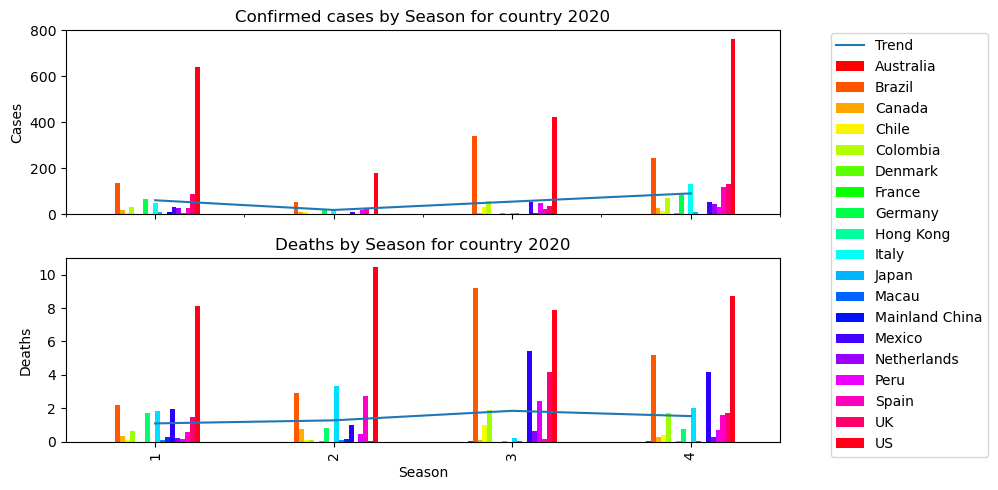

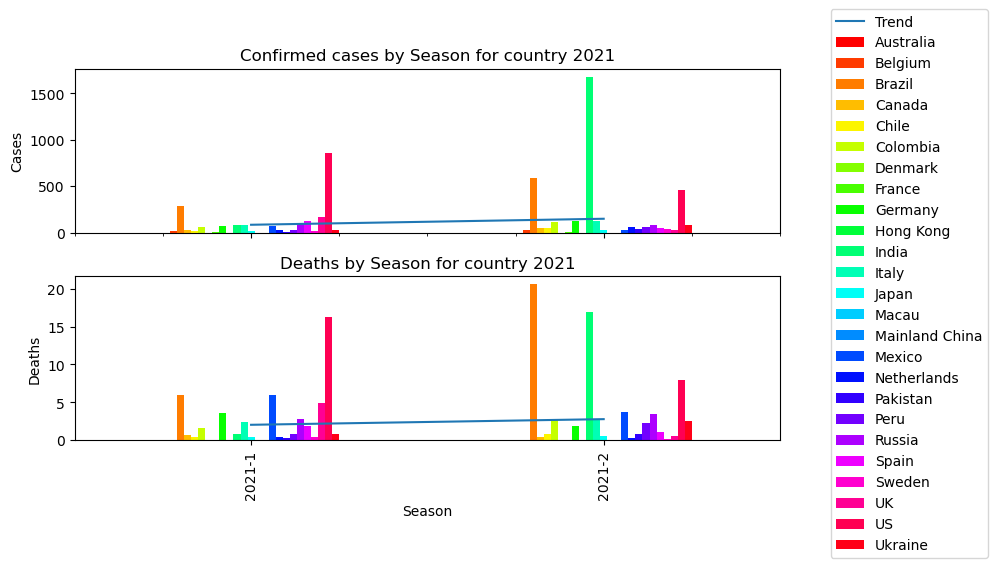

In [31]:
graph_by_season(covid_2020_seasonal, "2020")
graph_by_season(covid_2021_seasonal, "2021")

## Objective 2 - Analyze if provinces with higher populations had proportional rates of cases and deaths, potentially indicating strain on healthcare resources.

### Explanation of Results

The first step taken on this analysis was the calculation of the correlation between the population of a province and the cases and deaths reported. This was measured using the latest day which contained data for the most provinces on the same date, as the data was cumulative and not all dates contained values for all of the provinces, this allowed to capture as much information as possible. 

When running a Pearson correlation coefficient test for cases and death in relation to population, the value of the correlation tests were 0.03 and 0.06 respectively. As the values for this test range from -1 to 1 indicating a strong negative/strong positive correlation and the values received were very close to 0, it is indicating that there is almost no correlation between these variables. 

The correlation by population size category indicated that provinces with higher populations seem to have a greater number of cases and deaths per 100K. However, the weak correlation values given conclude that other factors may contribute to this. The higher number of deaths when categorised into population size could indicate strain on the healthcare system of larger provinces.

A big outlier in this data was the Hubei province which had a much higher rate of cases and deaths to population ratio. This was analysed and concluded that it was likely due to the province being where the outbreak was initially recognised, leading to higher testing in this area and no vaccines/distancing measures in place to allow the virus to spread easily.

From these results it can be concluded that there is potential strain on the healthcare system in larger provinces but that it may not only be linked to population size and other variables may play a part in this. To know the answer for this more data would be needed about hospitalisation rates during this period in comparison to the normal rates. 

While there is indication that higher population provinces may have experienced more cases and deaths, factors like healthcare infrastructure, public compliance and testing could play significant roles in this.


### Visualisation
###### Figure 2
The below figure shows that the cases and deaths per 100K people has no correlation and that across all provinces with the exception of Hubei, the cases and deaths per 100K remains at a similar level. 

Most provinces have less than 30 per 100K in regards to cases and less than 1 per 100K for deaths.

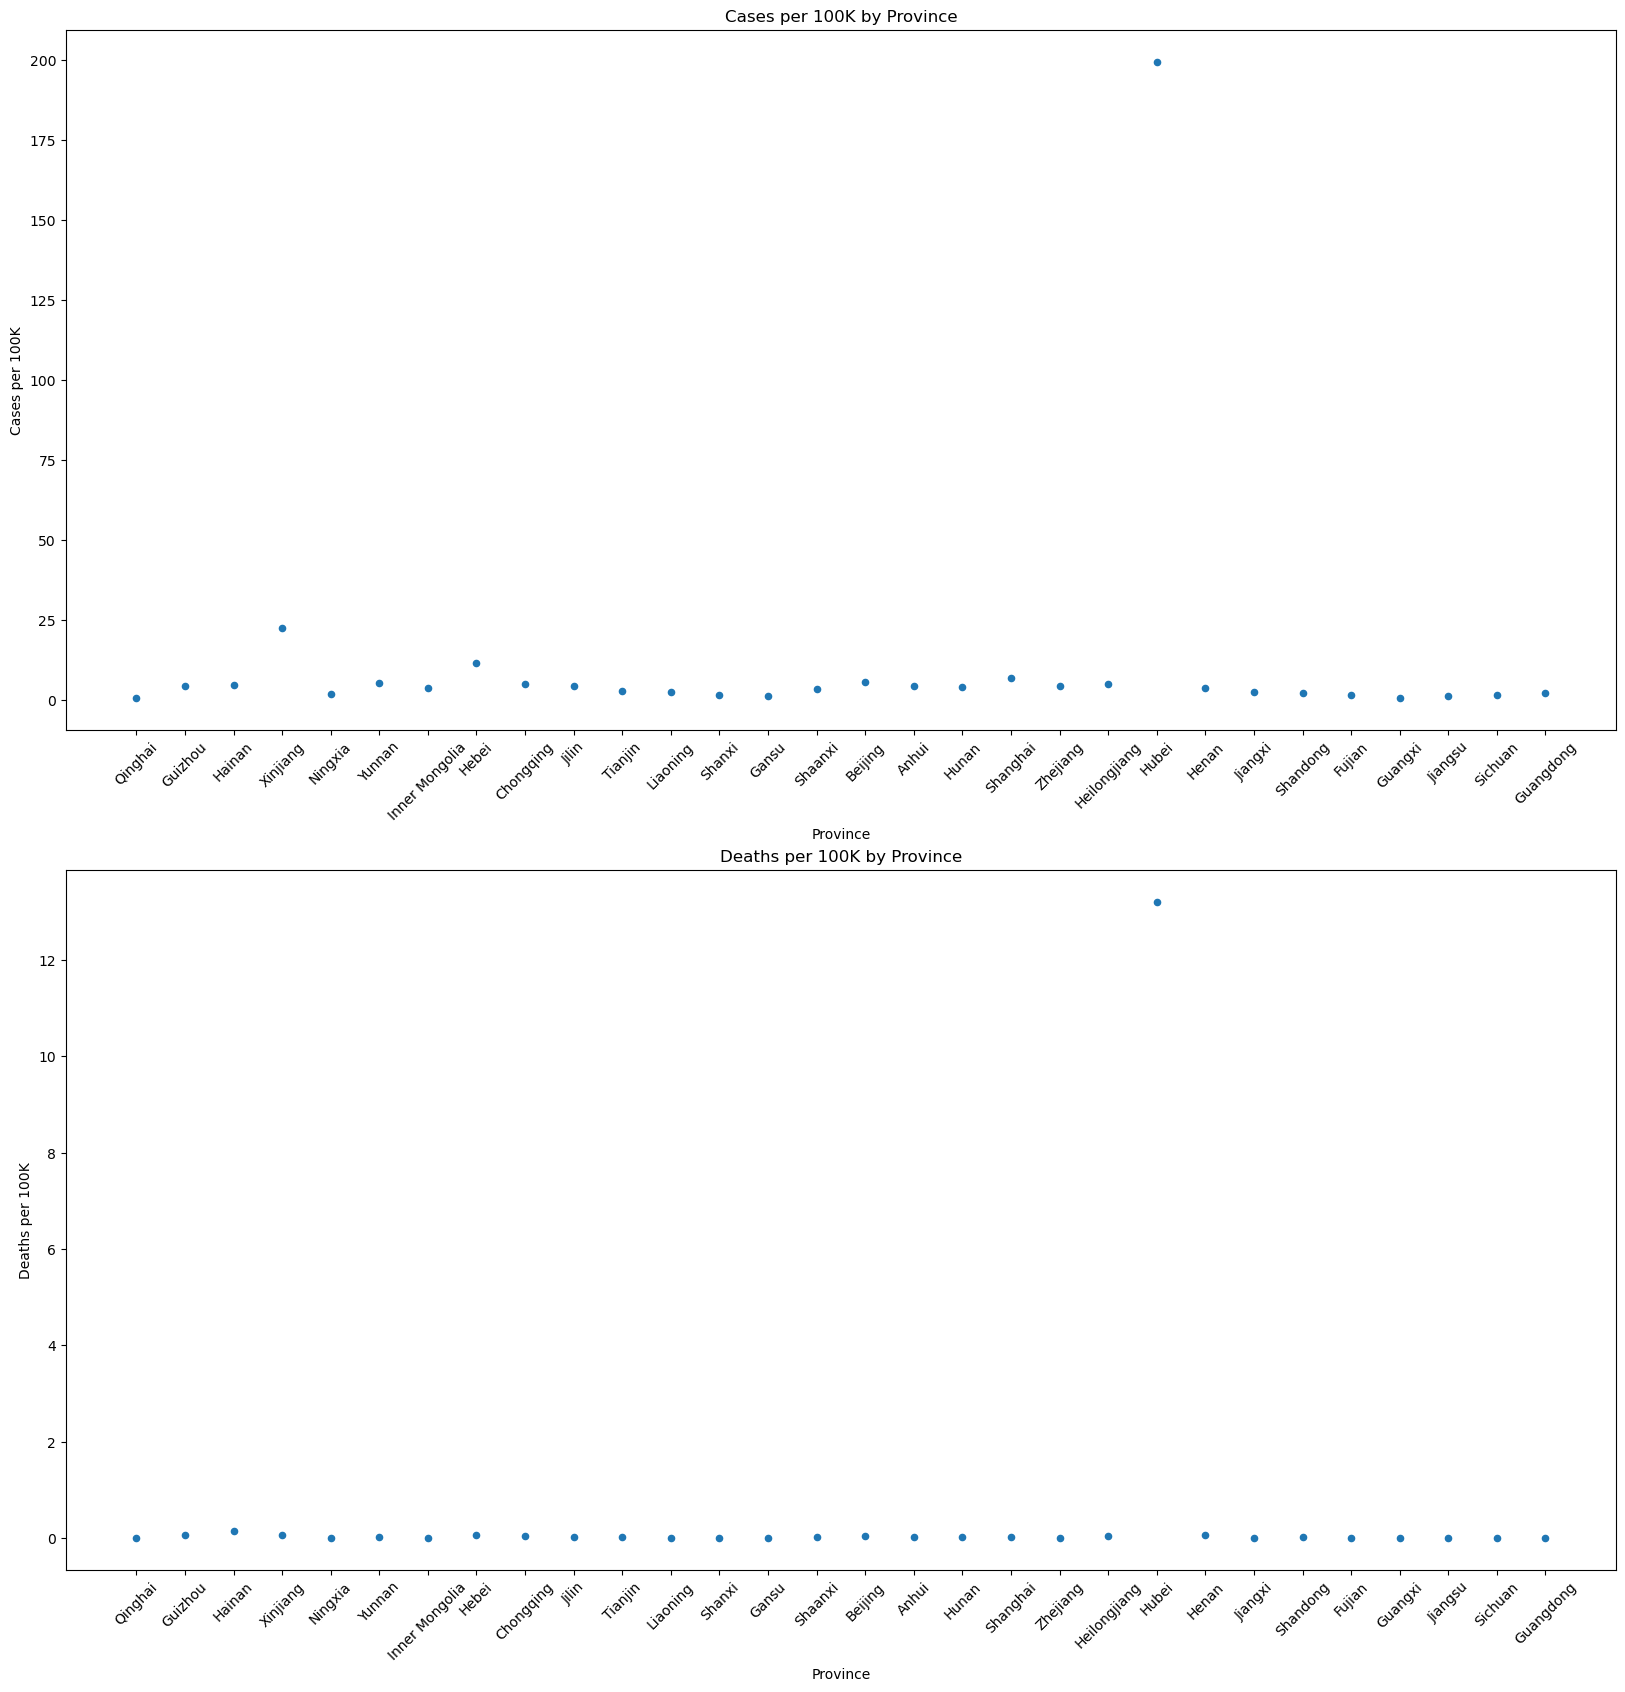

In [32]:
plot_scatters()

###### Figure 3
From the boxplot below it can be seen that most of the data is grouped between lower values with a few outliers being shown for both cases and deaths. This indicates that there is not a correlation between population sizes and cases/deaths as for vast majority of entries all data is located around the same values. 

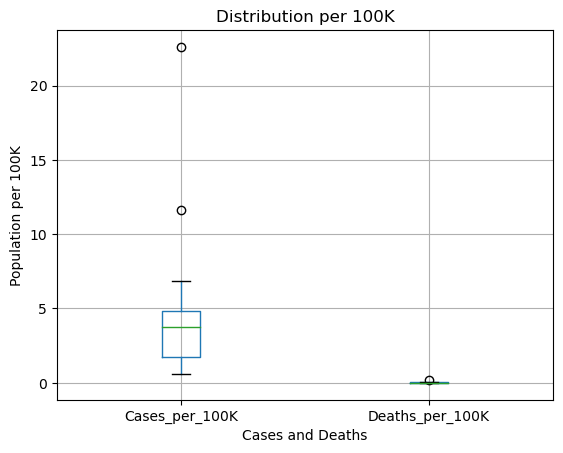

In [33]:
cases_boxplots()

###### Figure 4
The graphs below show a visual representation of the the cases and deaths per 100k population. This graph makes it simple to visualise which province is the outlier on this data. Hubei is vastly higher in both cases and deaths per 100k and a log scale has to be used as the values are much higher than the other values in the dataset. 

As the outbreak of covid began in Wuhan which is located in the Hubei province of China, it is reasonable to assume that the reason for this being such a big outlier is that it was closely monitored and so reporting cases would be highly accurate, furthermore a lot of the cases were towards the beginning of the pandemic before any vaccines had been created to tackle this issue. This can be seen more below where the first season of cumulative data can be seen to be much higher in Hubei. 

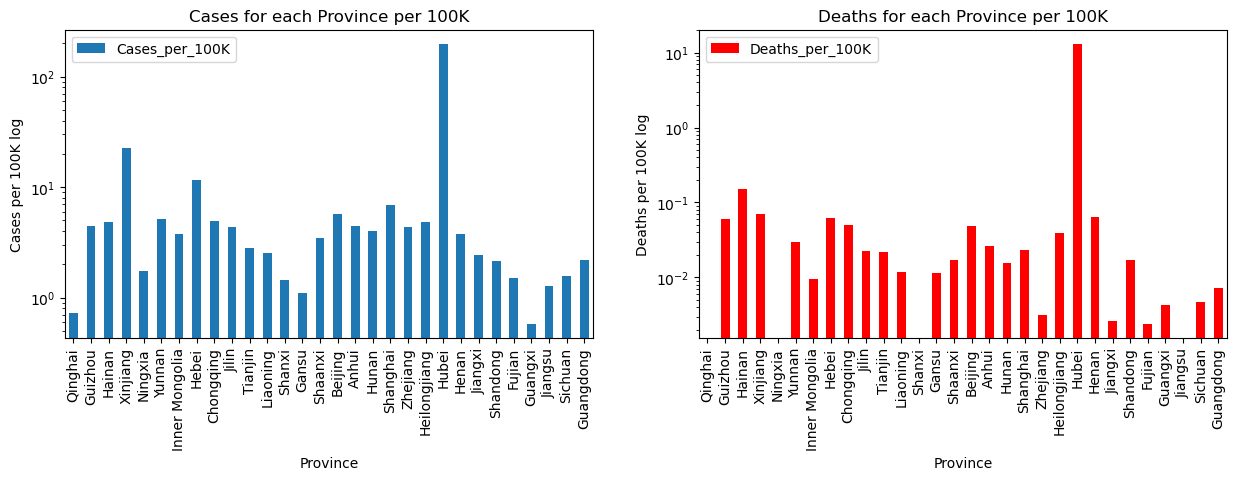

In [34]:
cases_barcharts()

###### Figure 5
The below graphs show that there is no trend between either cases or deaths by population category as in both the values decrease from the low to medium category but then increase from the medium to high category.

There is a high increase when comparing low to high without taking medium size provices into account. This would indicate higher population areas have more cases relative to their population. This is true for both cases and deaths when grouped by population size category.

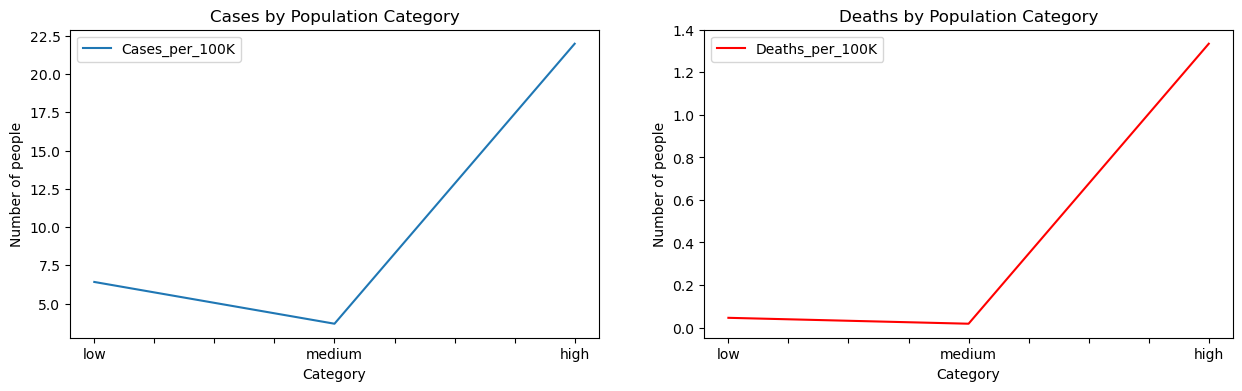

In [35]:
category_plot_cases_and_deaths()

###### Figure 6
The figure below shows the daily confirmed cases reported in the Hubei province. This shows that the vast majority of the cases were reported towards the beginning of the records when vaccines and distancing measures were not in place and little was known about the virus. This would cause the data to be an outlier for objective 2 as the records measured in this objective were cumulative and other provinces would have been unlikely to have recorded in the same way towards the start of the pandemic. 

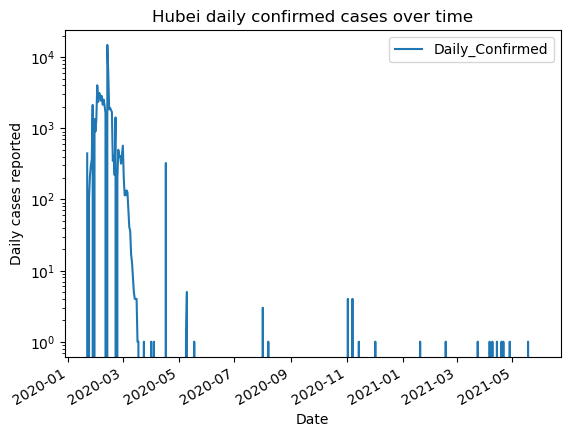

In [36]:
hubei_chart()

## Objective 3 - Determine if provinces with higher populations have the highest mortality rates among confirmed cases.
### Explanation of Results

This objective analysed the data to determine if provinces with higher populations had higher mortality rates among confirmed cases in relation to lower population provinces. 

The case fatality rate (CFR) was created by the formula:
$$CFR = (\dfrac{deaths}{confirmed}) \times 100 $$

Using this formula and sorting the provinces by population showed that there was no correlation between the population and the CFR. 

A Pearson Correlation coefficient test was then performed on the case fatality rate against population size producing a value of -0.05. As this value is almost 0 it concludes that the CFR has no correlation with the population.

An Anova test was also performed on the CFR rate by population category giving an F-stat of 22.96 and a P-value of 1.49e-06 showing that there was a statistically significant difference in the means of population category bins and the CFR.

As the correlation test shows linear relationships the ANOVA test compared differences between group means and so is a different type of test that gave extra information on the overall relationship between the CFR and population of provinces. 

The combined results from the correlation and ANOVA test show that although there is a significant difference in CFR across population categories the specific nature of the different would require further analysis and it is likely different factors contributing to this difference.


### Visualisation
###### Figure 7
The below chart shows the CFR in regards to the population for each province. As the CFR is within a similar range for each population value, it cna be concluded that population has no effect on CFR and that there is no correlation. 

Most provinces have a CFR below 2 regardless of population size. There is a notable difference in one CFR being over 6 but does not have a higher populaiton value. 

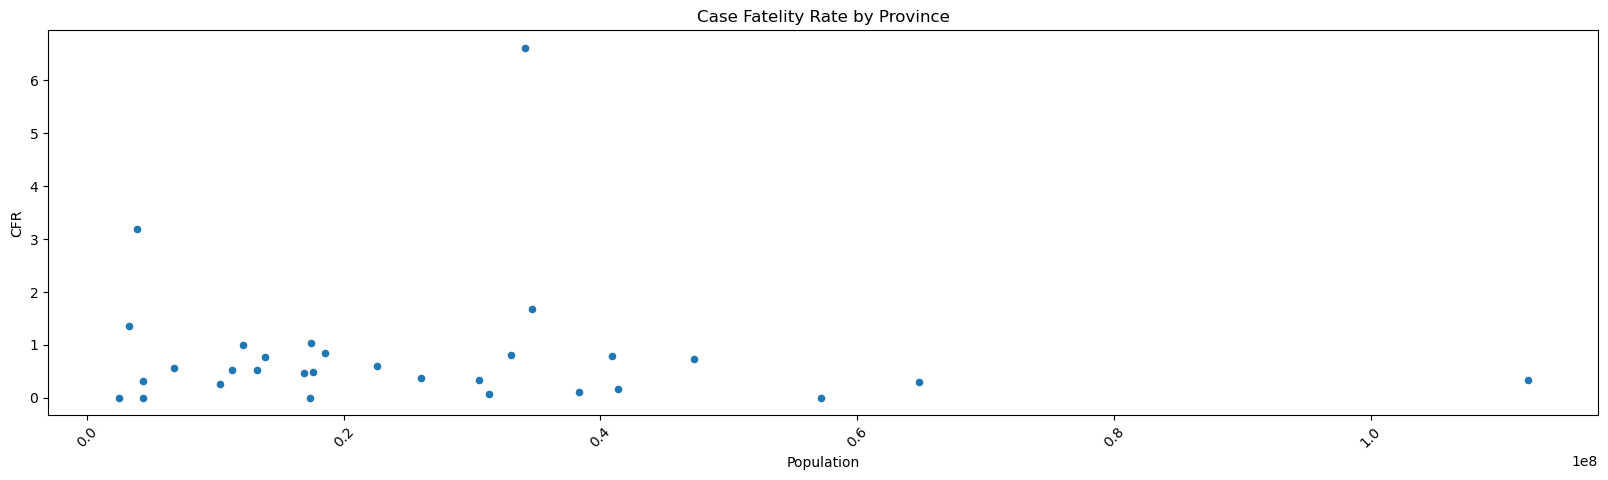

In [37]:
china_CFR_chart()

###### Figure 8
The below graphs show that the CFR per category does not follow a single trend and that the values decrease from low to medium and then increase to high. This can confirm that there is no correlation between the CFR and population of the provinces. 

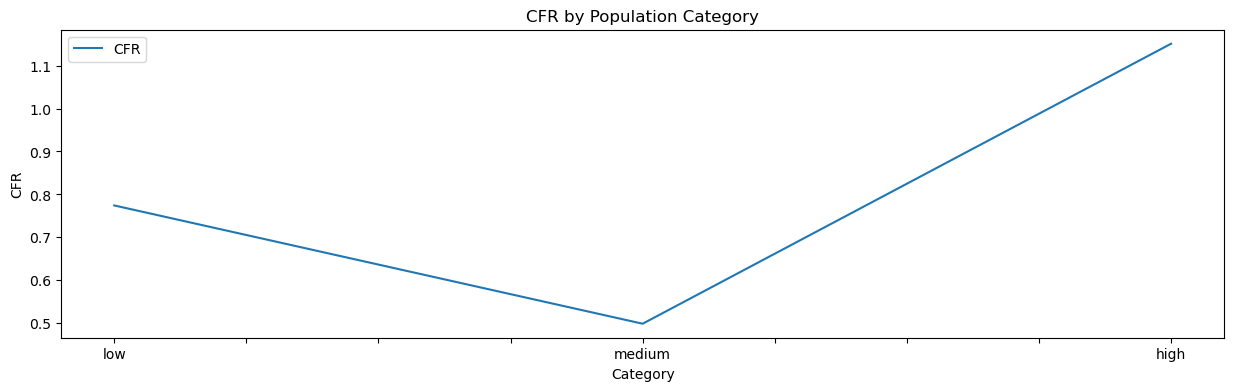

In [38]:
category_plot()

# Conclusion and presentation (10 marks)

### Achievements
Surprisingly the results of the objectives were not as expected but it was possible to conclude that there was no correlation between the seasons and the number of reported cases and deaths and also that no correlation was found between the population of provinces in China and the cases, deaths or case fatality rate when measured as separate provinces or population size categories.  As there are no correlations or statistical significance between these values it may mean they would be able to be used effectively within a logistic regression model to make predictions on various variables contained within the data. 

### Limitations

The limitations of this project are that the data range only spans 1.5 years during a period where reporting, treatment, and prevention of the covid virus was rapidly changing. This could have caused the data to not be fully representative of the correlations that may have occurred if these variables were more consistent. Furthermore, the reliability of data collection may differ between regions and external factors like cultural attitudes towards preventative measures could influence the reported numbers in this data.

### Future Work

In the future it would be useful to obtain data from a later period in time after the vaccines had been rolled out and the initial spikes had stabilised to see if any correlations occurred after this period. Furthermore, combining this data with additional datasets such as hospitalisation rates would be useful for analysing the effects that the virus had on healthcare infrastructure. Expanding the analysis to include countries by GDP would also be useful to see if there are any trends in the cases and deaths between richer and poorer countries. 

### Video Presentation
